# Avaliação de Perfil de Clientes para Aprovação de Empréstimos: Educacional, Médico, Venture (Capital de Risco, investimentos para startups), Empréstimo Pessoal, Quitação de Dívidas e Reforma Residencial
Nesse projeto, será desenvolvido um <b>modelo de machine learning</b> com o objetivo de prever e estipular valores aprovados para cada cliente para Empréstimo. Serão utilizadas técnicas de <b>aprendizado supervisionado</b> com a separação de um dataset para treino e um para teste. Ao final do desenvolvimento do modelo será disponibilizada uma <b>interface gráfica</b> onde o Analista Financeiro, responsável pela simulação, preencherá as informações de cada cliente para serem analisadas.

Utilizarei a seguinte <b>pipeline</b> baseada no <b>CRISP-DM framework:</b>

<b>1. Definição do problema de negócio</b><br>
<b>2. Coletar e ter uma visão inicial dos dados</b><br>
<b>3. Divide os Datasets em treino e teste</b><br>
<b>4. Exploração de dados (EDA: exploratory data analysis)</b><br>
<b>5. Feature engineering, limpeza dos dados e processamento da base</b><br>
<b>6. Treinamento de modelos, comparar, selecionar as melhores features e hiperparâmetros</b><br>
<b>7. Seleção e treinamento do modelo com os melhores resultados</b><br>
<b>8. Conclusão e interpretação dos resultados do modelo final</b><br>
<b>9. Deploy</b><br>

Neste notebook, realizarei as etapas de <b>modelagem e construção dos modelos de machine learning</b>, cobrindo as etapas 1 a 4 do pipeline acima. O principal objetivo aqui é descobrir insights que nos forneçam <b>informações valiosas sobre os padrões dos clientes que solicitam o serviço dentro das características disponíveis</b>. Assim, mesmo antes de construir um modelo, será possível ajudar o banco a identificar perfis e tendências de clientes. Além disso, abordarei essas etapas em detalhes abaixo, explicando o motivo de cada decisão tomada.


# 1. Problema de negócio
- Dificuldade em classificar e determinar as aprovações dos valores de financiamento para cada cliente de acordo com as suas informações.

- O que é experado?
    - Quando um cliente entra na loja...
    - Evitar a análises incorretas ou inquerentes com os princípios do banco
    - Ajudar o Analista Financeiro a agregar sua tomada de decisão...

- Entrega final?

- Quais são os benefícios?

- Interface gráfica ao final do projeto

### Importando bibliotecas e arquivos necessários

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import boto3

from sklearn.model_selection import train_test_split

import const
from utils import *

# Configurações de linhas e colunas
pd.get_option("display.max_rows")
pd.get_option("display.max_columns")

# Exibe gráficos direto no notebook
%matplotlib inline

# Aplica estilo dos gráficos
mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor'] = 'white'      # Fundo dos gráficos branco
mpl.rcParams['axes.linewidth'] = 1            # Espessura das bordas dos eixos
mpl.rcParams['xtick.color'] = 'black'         # Cor dos ticks do eixo X
mpl.rcParams['ytick.color'] = 'black'         # Cor dos ticks do eixo Y
mpl.rcParams['grid.color'] = 'lightgray'      # Cor da grade (linhas de fundo)
mpl.rcParams['figure.dpi'] = 150              # Resolução das figuras (DPI)
mpl.rcParams['axes.grid'] = True              # Ativa a grade no gráfico
mpl.rcParams['font.size'] = 12                # Tamanho da fonte

# Palette Setting
color_palette = ['#FFD700', '#9400D3', '#FFFF00', '#8A2BE2', '#F0E68C', '#EE82EE']
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(1.0, 0.8431372549019608, 0.0),
 (0.5803921568627451, 0.0, 0.8274509803921568),
 (1.0, 1.0, 0.0),
 (0.5411764705882353, 0.16862745098039217, 0.8862745098039215),
 (0.9411764705882353, 0.9019607843137255, 0.5490196078431373),
 (0.9333333333333333, 0.5098039215686274, 0.9333333333333333)]

# 2. Entendendo os dados
- O Dataset não é público e possue acesso através da função chamada <b>fetch_data_from_db</b> encontrada no arquivo <b>Utils.py</b>.
- Os dados são consultados através da conexão utilizando o psycopg2, e a query para seleção dos dados.

In [7]:
df = fetch_data_from_db()
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Dicionário de dados
1. Age -> Idade
2. Annual Income -> Renda Anual
3. Home ownership -> Propriedade da casa
4. Employment length (in years) -> Tempo de emprego (em anos)
5. Loan intent -> Intenção de empréstimo
6. Loan grade -> Classe do empréstimo
7. Loan amount -> Valor do empréstimo
8. Interest rate -> Taxa de juros
9. Percent income -> Percentual da renda
10. Historical default -> Inadimplência histórica
11. Credit history length -> Comprimento do histórico de crédito
</br>
<b>Target:</b> Loan status (0 is non default 1 is default) -> Status do empréstimo (0 é não inadimplente, 1 é inadimplente)

In [5]:
df.rename(columns={
    'person_age': 'idade',
    'person_income': 'renda_anual',
    'person_home_ownership': 'tipo_residencia',
    'person_emp_length': 'tempo_emprego',
    'loan_intent': 'objetivo_emprestimo',
    'loan_grade': 'cd_objetivo_emprestimo',
    'loan_amnt': 'valor_emprestimo',
    'loan_int_rate': 'taxa_juros',
    'loan_status': 'estatus_inadimplencia',
    'loan_percent_income': 'percentural_renda_consumido',
    'cb_person_default_on_file': 'historico_inadimplencia',
    'cb_person_cred_hist_length': 'anos_de_credito'
}, inplace=True)

In [6]:
df.head()

,idade,renda_anual,tipo_residencia,tempo_emprego,objetivo_emprestimo,cd_objetivo_emprestimo,valor_emprestimo,taxa_juros,estatus_inadimplencia,percentural_renda_consumido,historico_inadimplencia,anos_de_credito
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


- analizar historico de inadimplencia com inadimplencia atual
- analizar percentual de consumo do emprestimo na renda com o status de inadimplencia atual
- valores de emprestimos que consomem acima de 50% da renda tem maior inadimplencia?
- pessoas com inadimplencia histórica tem maior inadimplencia atual?
- o objetivo do emprestimo representa alguma relevancia com a inadimplencia?
- relação de todas as variáveis com a estatus_inadimplencia

In [5]:
df.shape

(32581, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Limpeza e tratamento de dados

In [7]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Excluir valores nulos, devido a quandidade de dados restantes

In [8]:
# Apagar registros nulos
df_filtrado = df.dropna()

In [9]:
df_filtrado.shape

(28638, 12)

In [10]:
df_filtrado.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [11]:
df_filtrado.duplicated().sum()

137

In [12]:
df_limpo = df_filtrado.drop_duplicates()

In [13]:
df_limpo.duplicated().sum()

0

In [14]:
# Confirma que todas as colunas estão minusculas
df_limpo.columns = [x.lower() for x in df.columns]

In [15]:
# Renomeia coluna classe para churn_flag
df_limpo.rename(columns={'loan_status': 'target'}, inplace=True)

C:\Users\vinic\AppData\Local\Temp\ipykernel_25000\2870611906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo.rename(columns={'loan_status': 'target'}, inplace=True)


In [16]:
df_limpo.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,28501.0,27.738676,6.316166,20.00,23.00,26.00,30.00,144.00
person_income,28501.0,66654.411319,62376.028215,4000.00,39500.00,56000.00,80000.00,6000000.00
person_emp_length,28501.0,4.790148,4.157462,0.00,2.00,4.00,7.00,123.00
loan_amnt,28501.0,9658.533034,6329.604672,500.00,5000.00,8000.00,12500.00,35000.00
loan_int_rate,28501.0,11.045385,3.230748,5.42,7.90,10.99,13.48,23.22
target,28501.0,0.217115,0.412289,0.00,0.00,0.00,0.00,1.00
loan_percent_income,28501.0,0.169517,0.106410,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,28501.0,5.800498,4.042153,2.00,3.00,4.00,8.00,30.00


Insights observados:

1. Coluna <b>person_age</b> possui valor máximo de 144, pode indicar <b>outliers</b>.
2. A média da renda anual, coluna <b>person_income</b>, é de aproximadamente 66.654,00, mas o desvio padrão está muito alto, diferença muito grande entre a média e os valores extremos. Outlier? Valor de 6 milhões e 4 mil muito divergentes.
3. Em <b>person_emp_length</b>, valores mínimos, média e desvio padrão estão ok, mas valor máximo de 123 representa <b>outlier</b>.
4. Na coluna <b>loan_status</b>, os valores se encontram entre 0 e 1 e a média é 0.217, isso representa que 21.7% dos empréstimos entraram em inadinplência. Essa pode ser uma ótima métrica para vermos a efetividade do nosso modelo.
5. Relação renda/valor do empréstimo: Em média, os empréstimos comprometem cerca de 17% da renda anual.
 

### Tratando Outliers

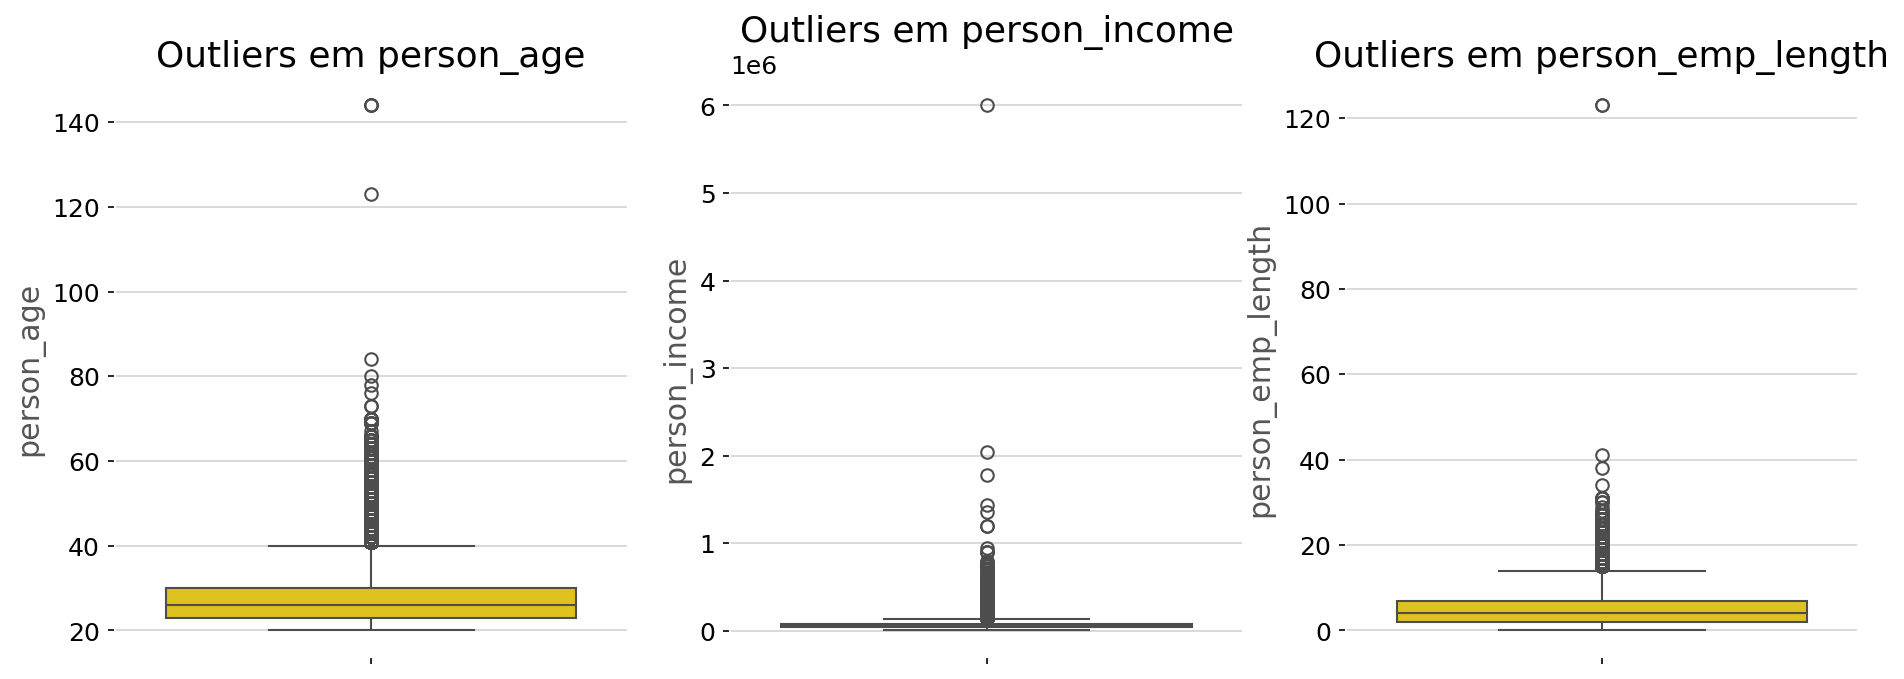

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df_limpo['person_age'], ax=axes[0])
axes[0].set_title('Outliers em person_age')

sns.boxplot(y=df_limpo['person_income'], ax=axes[1])
axes[1].set_title('Outliers em person_income')

sns.boxplot(y=df_limpo['person_emp_length'], ax=axes[2])
axes[2].set_title('Outliers em person_emp_length')

plt.show()

In [18]:
# Tratar outliers de person_age
df_limpo = tratar_outliers(df_limpo, 'person_age', 20, 100)

c:\Users\vinic\Desktop\Data Science\Machine-Learning-Consessao-de-Credito\utils.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = df[coluna].apply(lambda x: mediana if x < minimo or x > maximo else x)


In [19]:
# Tratar outliers de person_income
df_limpo = tratar_outliers(df_limpo, 'person_income', 10000, 500000)

c:\Users\vinic\Desktop\Data Science\Machine-Learning-Consessao-de-Credito\utils.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = df[coluna].apply(lambda x: mediana if x < minimo or x > maximo else x)


In [20]:
# Tratar outliers de person_emp_length
df_limpo = tratar_outliers(df_limpo, 'person_emp_length', 0, 50)

c:\Users\vinic\Desktop\Data Science\Machine-Learning-Consessao-de-Credito\utils.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = df[coluna].apply(lambda x: mediana if x < minimo or x > maximo else x)


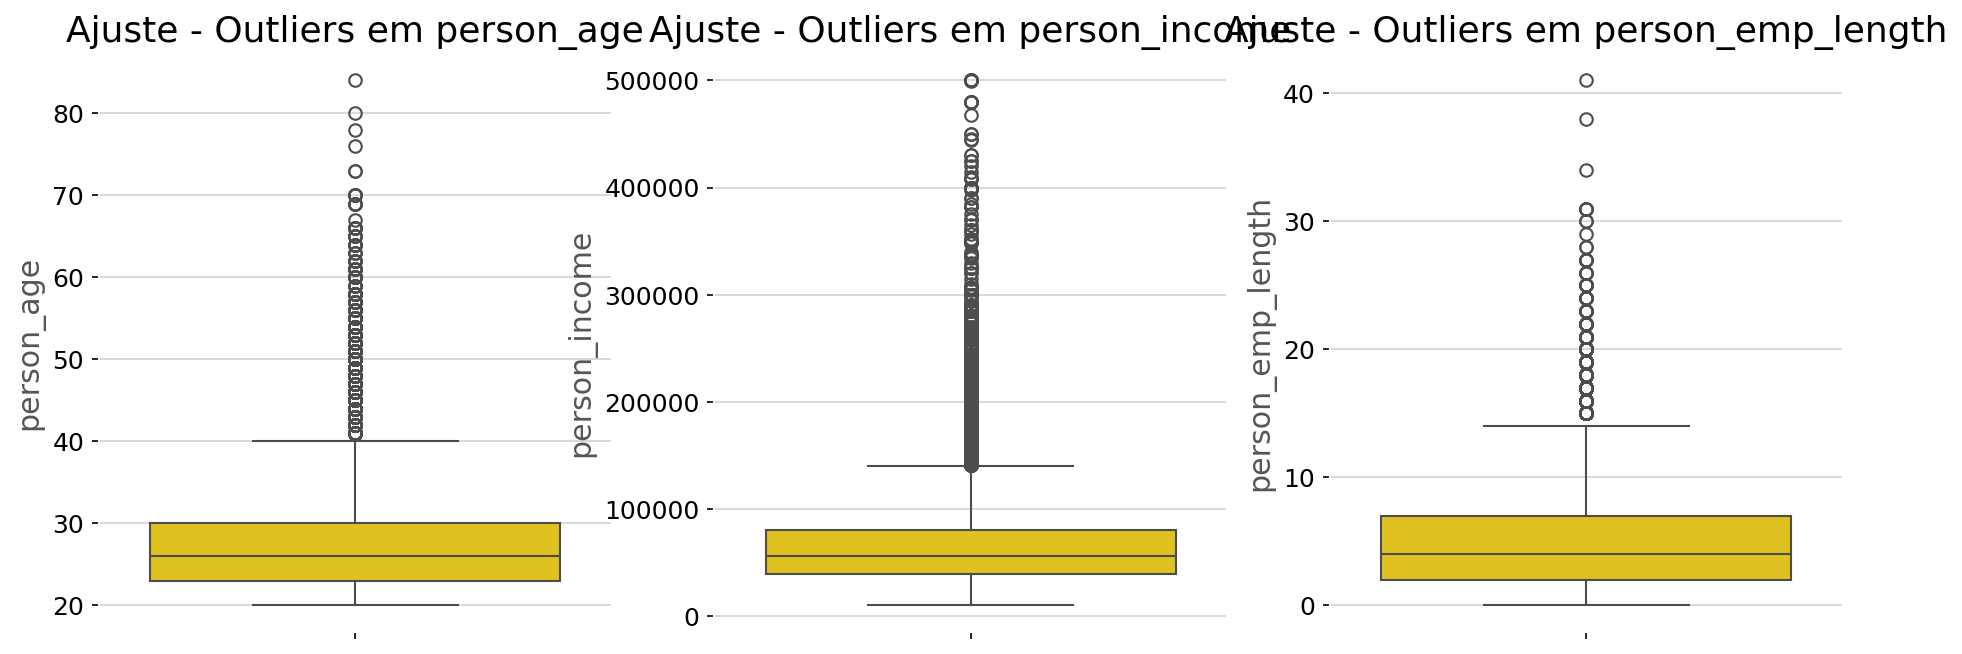

In [21]:
# Analise após tratamento dos outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df_limpo['person_age'], ax=axes[0])
axes[0].set_title('Ajuste - Outliers em person_age')

sns.boxplot(y=df_limpo['person_income'], ax=axes[1])
axes[1].set_title('Ajuste - Outliers em person_income')

sns.boxplot(y=df_limpo['person_emp_length'], ax=axes[2])
axes[2].set_title('Ajuste - Outliers em person_emp_length')

plt.show()

In [22]:
df_limpo.describe(include=["object"]).T

,count,unique,top,freq
person_home_ownership,28501,4,RENT,14498
loan_intent,28501,6,EDUCATION,5670
loan_grade,28501,7,A,9345
cb_person_default_on_file,28501,2,N,23411


# 3. Divide os Datasets em treino e teste
- Apenas 21.7% dos registros são de pessoas que vieram a inadimplência, isso pode causar um grande desbalanceamento na divisão dos dados de treino e de teste.
- Para contornar o desbalancemanto, é utilizado o <b>stratify=y</b> na função train_test_split, garantimos que a proporção seja mantida nos conjuntos de treino e teste.

In [23]:
X = df_limpo.drop(columns=['target'])
y = df_limpo['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=27)

In [24]:
print(f'O tamanho do dataset de treino é: {X_train.shape}')
print(f'O tamanho da target do treino é: {y_train.shape}')
print(f'O tamanho do dataset de teste é: {X_test.shape}')
print(f'O tamanho da target de teste é: {y_test.shape}')

O tamanho do dataset de treino é: (22800, 11)
O tamanho da target do treino é: (22800,)
O tamanho do dataset de teste é: (5701, 11)
O tamanho da target de teste é: (5701,)


In [25]:
print('Proporção da target de treino: ')
print(f'{y_train.value_counts(normalize=True)}')
print('Proporção da target de teste: ')
print(f'{y_test.value_counts(normalize=True)}')

Proporção da target de treino: 
target
0    0.782895
1    0.217105
Name: proportion, dtype: float64
Proporção da target de teste: 
target
0    0.782845
1    0.217155
Name: proportion, dtype: float64


# 4. Exploração de dados (EDA: exploratory data analysis)

In [26]:
# Juntar datasets de treino
df_analise = pd.concat([X_train, y_train], axis=1)
df_analise.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,target
1074,23.0,24000.0,OWN,1.0,EDUCATION,B,1500,12.21,0.06,N,2,0
28777,33.0,50000.0,RENT,1.0,HOMEIMPROVEMENT,A,9000,7.51,0.18,N,9,0
27993,31.0,120000.0,MORTGAGE,6.0,DEBTCONSOLIDATION,A,28000,8.90,0.23,N,6,0
8020,21.0,35000.0,RENT,5.0,DEBTCONSOLIDATION,B,7200,12.69,0.21,N,3,0
3362,21.0,36000.0,RENT,3.0,HOMEIMPROVEMENT,B,11000,10.37,0.31,N,4,1


In [27]:
for i in df_analise.describe(include=["object"]).columns:
    print(df_analise[i].value_counts())
    print("*" * 50)

person_home_ownership
RENT        11594
MORTGAGE     9383
OWN          1749
OTHER          74
Name: count, dtype: int64
**************************************************
loan_intent
EDUCATION            4529
MEDICAL              4247
VENTURE              3968
PERSONAL             3852
DEBTCONSOLIDATION    3662
HOMEIMPROVEMENT      2542
Name: count, dtype: int64
**************************************************
loan_grade
A    7479
B    7306
C    4554
D    2528
E     705
F     177
G      51
Name: count, dtype: int64
**************************************************
cb_person_default_on_file
N    18748
Y     4052
Name: count, dtype: int64
**************************************************


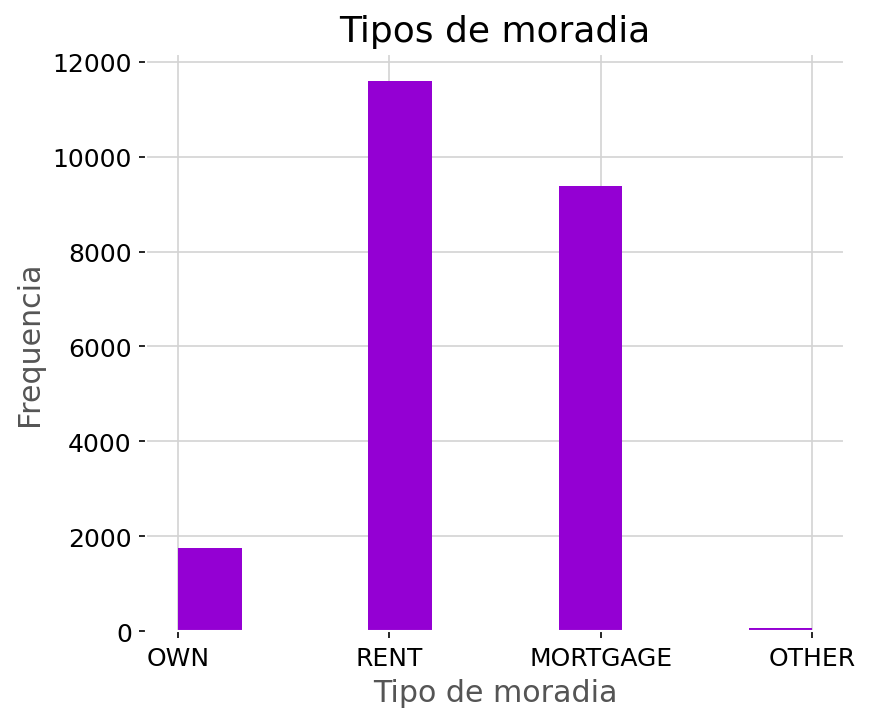

In [42]:
plt.figure(figsize=(6,5))
plt.hist(df_analise['person_home_ownership'], color='#9400D3')
plt.xlabel('Tipo de moradia')
plt.ylabel('Frequencia')
plt.title('Tipos de moradia')
plt.show()